In [17]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
import seaborn as sns

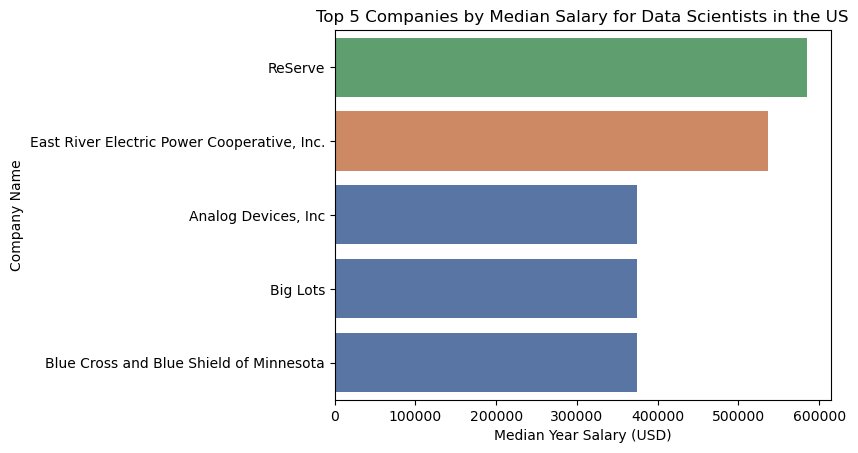

In [31]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

count = df_DS.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=count, x='salary_year_avg', y='company_name', hue='salary_year_avg', palette='deep', legend=False)

plt.title('Top 5 Companies by Median Salary for Data Scientists in the US')
plt.ylabel('Company Name')
plt.xlabel('Median Year Salary (USD)')
plt.show()



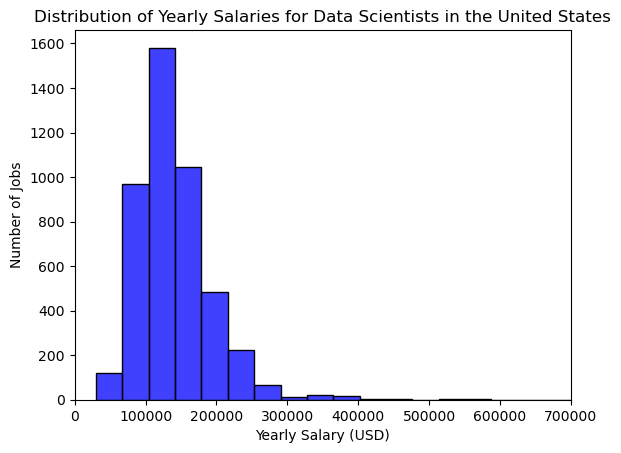

In [40]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

sns.histplot(data=df_DS, x='salary_year_avg', bins=25, kde=False, color='blue')
plt.title('Distribution of Yearly Salaries for Data Scientists in the United States')
plt.ylabel('Number of Jobs')
plt.xlim(0, 700000)
plt.xlabel('Yearly Salary (USD)')
plt.show()

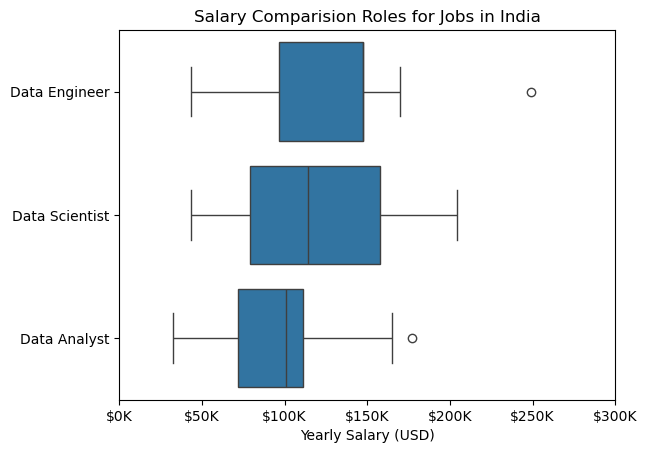

In [52]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg']).copy()

sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')

plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 300000)
plt.ylabel('')
plt.title('Salary Comparision Roles for Jobs in India')
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

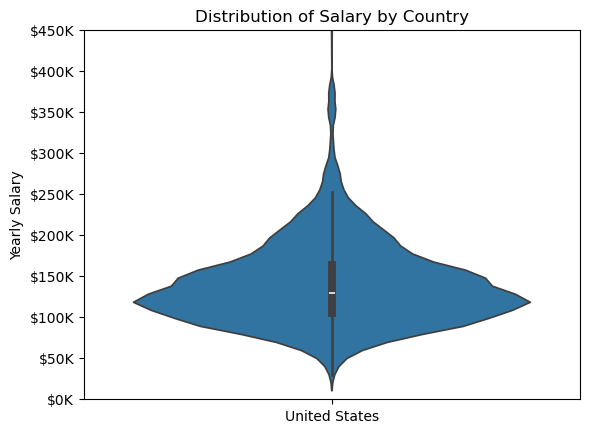

In [63]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

sns.violinplot(data=df_DS, x='job_country', y='salary_year_avg')

plt.ylim(0, 450000)
plt.ylabel('Yearly Salary')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.xlabel('')
plt.title('Distribution of Salary by Country')
plt.show()
